# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices



## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit   

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

C:\Users\alip\programs\anaconda3\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


C:\Users\alip\programs\anaconda3\envs\py27\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [3]:
data.head(5)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [4]:
# Hint: I used the optional parameters for my own understanding
''' 
I could use the nanmin and similar methods to treat the missing data; however, since this dataset has already been 
treated for this project, I don't bother to use them. 
'''
# TODO: Minimum price of the data
minimum_price = np.amin(prices, axis=0)

# TODO: Maximum price of the data
maximum_price = np.amax(prices, axis=0)

# TODO: Mean price of the data
mean_price = np.mean(prices, axis=0)

# TODO: Median price of the data
median_price = np.median(prices, axis=0)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices, axis=0)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* 1- Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* 2- Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* 3- Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

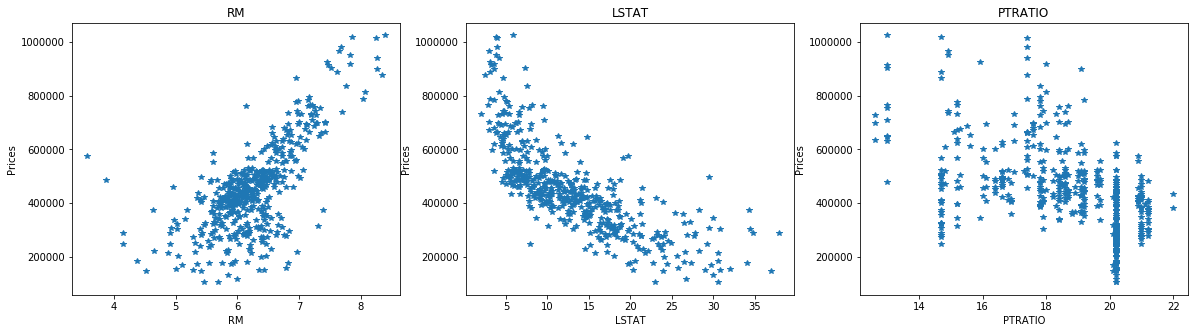

In [5]:
# This cell is to verify my intuition to answer the above-mentioned questions:
num_of_features = features.shape[1]
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

for enum, feature in enumerate(features.columns):
    plt.subplot(1, num_of_features, enum + 1)
    plt.plot(data[feature], prices, '*')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Prices')

**Answer: <br>
1- MEDV ~ RM** -> A higher RM probably means a higher price for the house. __RM__ stands for the number of rooms. typically, a house with more number of rooms is considered more valuable since it is usually bigger and also more people can have their own rooms. Therefore, a house with RM=7 is likely to have a higher price than a house with RM=6, assuming other factors that affect the price are identical in both cases.<br>
**2- MEDV ~ 1/LSTAT** -> A higher LSTAT probably means a lower price for the house. __LSTAT__ stands for the percent of lower class workers. An area with lower class workers is usually cheaper because they can afford to live there, which is due to less appealing socio-economic conditions such a crime-rate, gang-related activity, and the quality of life. Therefore, a house with LSTAT=20 has a lower price compared to a house with LSTAT=15, assuming other factors that affect the price are identical in both cases.<br>
**3- MEDV ~ 1/PTRATIO** -> A higher PTRATIO probably means a lower price for the house. __PTRATIO__ is the ratio of students to teachers in schools of that neighborhood. A lower PTRATIO is correlated to better education quality since every student can get more support and feedback from the teachers. Since a good number of families have children that go to grade school, this factor plays a role in the prices of the houses in a neighborhood or area. Therefore, a house with PTRATIO=15 probably has a lower price compared to a house with PTRATIO=10, assuming other factors that affect the price are identical in both cases.
The trend in the graph for this parameter is not as clear as other two variables; however, one can see a general trend where the prices go lower as PTRATIO goes higher. 

**

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [6]:
# could use the built-in method for r2_score of write the function:

def r2_score_manual(y_true, y_predict):
    # score = 1 - Sum(predict_error^2) / Sum(variation_from_mean^2)
    mean_y_true = np.mean(y_true)
    SSres = np.sum(np.square(np.subtract(y_true, y_predict)))
    SStot = np.sum(np.square(np.subtract(y_true, mean_y_true)))
    score = 1.0 - SSres/SStot
    return score
    
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    score = r2_score(y_true=y_true, y_pred=y_predict, sample_weight=None)
    #score = r2_score_manual(y_true, y_predict)
    return score

In [7]:
# This is used for personal understanding in one of the sections.
def drawResidualPlot(true_values, predictions, min_value, max_value):
    import matplotlib.pyplot as plt
    %matplotlib inline
    residuals = (true_values - predictions) / float(max_value)
    plt.plot(true_values, residuals, '*', [min_value, max_value], [0,0], '-')
    plt.ylim([-0.5, 0.5])
    plt.tight_layout()

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [8]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:5.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer: <br>
- __R^2 = 0.923__ is way closer to 1.0 rather than 0. Without context it is impossible to comment on the performance of the model. For example, it is important to know the size of the training data, the variation in the data set (which depends on the nature of the data), minimum acceptable accuracy of the model, etc.<br>
- After all, I believe the **acquired R^2 is a pretty good number** for most of applications that I know of since it means that **more than 92% of the variance of the true values can be captured with the model**.
**

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [9]:
'''Stratification is usually used for categorical target values; however, using it for continuous target values is useful
    by using the following function.
    This will help us in train_test_split to make sure our samples are balanced from different price levels.
    Looking at following link made me think of this, although its code is not functional. Code is my own work.
    michaeljsanders.com/2017/03/24/stratify-continuous-variable.html
'''

def stratify_continuous(target, target_min, target_max, no_of_bins=10): 
    bins = [int(bin) for bin in np.linspace(start=target_min, stop=target_max, num=no_of_bins)]
    min_bin_value = np.array(bins).min()
    # the subtraction is due to issues that occur 
    bins = np.array([(bin - int (min_bin_value / 2.0)) for bin in bins])
    target_stratify = np.digitize(target, bins)
    return target_stratify

- Note that there are __no obvious outliers__ in this data set since the min price ~ 100K USD and the max price ~ 1M USD. Therefore, I am not going to treat the data to remove outliers based on the intuition. Beside the reasonabl range of prices, the prices of houses are obtained from different areas and sizes, which can justify such a range. 

In [10]:
from sklearn.model_selection import train_test_split
import sklearn

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=1, shuffle=True, 
                                                    stratify= stratify_continuous(prices, minimum_price, maximum_price))

print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: <br>
- Generally, in order to have an unbiased performance measurement, one needs to randomly select a portion of the data and put them aside. Then they need to train the model without the test data. After training the data with the training data and tuning the parameters of the model (by using validation set), they need to __use the test model to measure the performance of the model__.<br>
- Moreover, without test data, we will test the perforamce of the model against the training data that we derived the model from. This usually __leads to overfitting the model__. Besides, using training data for testing does not make sense since we have already used the data to find the parameters. Thus, the performance measured in this way is probably better than reality.<br>
- I am not sure if there is a rule on the ratio of testing_set_size to data_set_size; however, it should be less than 0.5. The reason behind this statement is that we do not want to let more than half of the data to be unused in training and tuning our model. Therefore, for a lot of applications, __0.10 <= test_size <= 0.25__ seems good to me.<br>**

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

- Note that the following graph slightly differ whether or not we use stratification in dividing the train and validation sets

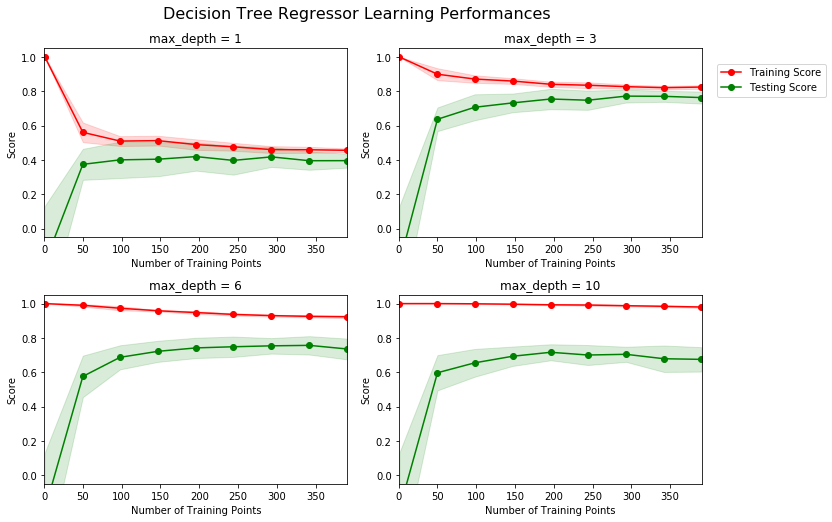

In [11]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: <br>
- __Chosen max depth = 3__. <br>
- The training curve score goes lower as the number of training points increases (this is common among all the graphs). But the testing score improves.<br>
- The reason I chose max_depth = 3 is that its testing and training scores __ almost "converge" to a number after a finite number of data points__. max_depth = 1 has the same characteristics; however, its converged score is lower than max_depth = 3, which indicates its inability to capture the complexity of the pattern in the data. 
- As can be seen there is a threshold for the number of data points where the model's testing curve score improves drastically. this number is around 50 training data points. Then the testing score improves slowly as the number of training points go higher. However, the testing curve score reaches a plateau after a certain number of points (~ 300) for max_depth = 3 (Note that for max_depth = 6 and 10, the score seems to have a peak at number_of_points ~ 250-300 and then goes lower afterwards).<br>
Therefore, adding more datapoints is beneficial up to a point until the model performance reaches a plateau. It is possible that adding more and more data improves the performance of the model for a certain problem; however, this does not mean that adding more and more data is a good policy. Adding more data after a certain point does not add much to the performance of the model, while it consumes more processing power to calculate the parameters for the model. Furthermore, it might tempt us to select more complex model for the data that does not necessarily represent the pattern in the data. 

**

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

- Note that the following graph can change whether or not we use stratification in dividing the train and validation sets

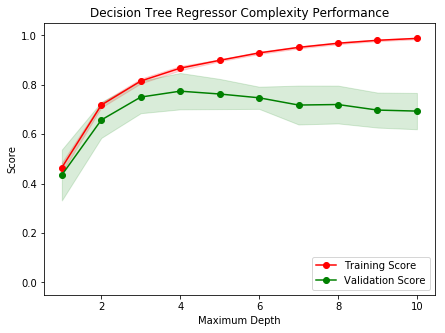

In [12]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: <br>
- With max_depth = 1, the models suffers from __high bias__. As you can see in the graph, the training and validation score are close to each other. Therefore, there is no high variance here; but, you can see that __both training and testing score are pretty low__ numbers, which indicate high bias. The reason behind this issue is that the model with max_depth = 1 does not capture the complexith of the data pattern and essentially __underfits the data__.
- With max_depth = 10, the model suffers from __high variance__. As you can see the training score is pretty high. The testing score is also decent. Therefore, there is not a high bias issue here. However, you can see there is a notable difference between the training and testing errors in the graph, which indicates high variance. This is a product of overfitting the model. The model tries to fit the training data too hard, which results in __memorizing the data rather than learning a good pattern__. This leads to higher errors for testing data.
<br><br>
- Note that the testing error uncertainty band is almost the same size in all depths. So, we did not include it in our analysis
<br>**

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: <br>
- __max_depth = 4 is my choice__.
- A good predictive model has a __small error on both training and validation sets of data__. Moreover, the __errors should be close to each other in a good model__. This indicates that the model is _"learning" a model and can "predict" the target variable_ for the data that has not used in the model (validation data) well, which is what we really care about. Therefore, the intuition that led me to this result was the fact that both validation and training scores are decent for max_depth = 4 and the difference between the scores is the small (max_depth = 4 is the divergence point between two graphs). Indeed, the validation score of max_depth = 4 is the highest amongs all possible complexities. 
- You can see that max_depth = 3 is also a good candidate since both its training and validation scores are closed than those for max_depth = 4. However, I prefer max_depth = 4 since its validation score is higher (most important) as well as the training score (which is expected).

**

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: <br>
- Imagine we have selected a model for a supervised learning problem. This model has parameters that need to be trained by the training data. However, one might not know the model that is going to be used beforehand. For example, if we want to model SVM to design a classifier for a binary data. If we only know that the classifier is a polynomial and nothing more, we cannot tell if the best line that separates the data should be a line or polynomial with degree 2 or more. Thus, another variable comes into play here. We call such variables “Hyperparameters”.
- Sometimes there are more than 1 hyperparameter involved in a (classification) problem. In this case, we need to examine the combination of different values for the hyperparameters for the model and capture the performance of the model represented by each combination of hyperparameters. For example, this performance can be measured by F1-Score.
- In a nutshell a grid entails a matrix of different values for hyperparameters. The state space dimension depends on the number of hyperparameters. For example, if “a” and “b” are the hyperparameters, the matrix is 2D with the values of “a” as rows and “b” as columns. For each hyperparameter, the range of value is chosen by intuition and it is then divided into a few numbers to include in the table. If there’s no intuition, an effective pattern should be used to find the range. For example, exponential factors (0.1, 1, 10, 100) in the table to find the range and then recursively refine the values until reached a good performance.
- This could be helpful in optimizing our learning algorithm. We define a performance criterion such as F1-Score. Then we train a model with training data and tune the model parameters considering only a certain combination of hyperparameters. We do this process for all the combinations (reasonable number of combinations) based on the possible values for each hyperparameters. After all, we pick the model with the best performance. Therefore, we used this technique to find the best model.
- An example for this could be a set of binary data that are separable by a boundary. We do not know the shape of the boundary (straight line, circle, polynomial). We also do not know the gamma parameter. So we design a grid search that the rows are type of Kernel (linear, polynomial with different degrees, RBF) and the columns are different values of the Gamma parameter (0.1, 1, 10, 100, 1000). We use all the combinations to find the best F1-score. After finding the best combination, we refine the values (the Gamma value here) to optimize our model. This way, we have found the best type of model and also tuned the parameters for that model. 
<br><br>
- Although grid search is explained with multiple hyperparameters, one can still use Grid search with one hyperparameter in the smae way. In this case, the performance of the models are compared by changing the only hyperparameter. 

**


### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: <br>
- k-fold cross validation: Imagine we have selected our model and performance criteria (for e.g. logistic regression and F1-Score). Then we need to divide our data to training and test data. This means that we are not using a certain portion of data points in training our model. Instead we can tackle this problem with k-fold cross validation. In k-fold cross validation technique, we split the training data into a finite number of sets, which each entail equal number of data points. This number is “k” (therefore, each set includes number_of_trainig_datapoint/k datapoints). It is recommended to shuffle data before this to eliminate the chance of bias in our data selection (shuffling is not recommended if the order of the data has a reason behind it, such as time series). A typical k is k = 10 for large enough datasets. After picking k, we select one of the subsets as our validation data and the rest (k-1 subsets) as training data. Then we measure the performance of the model for this setup with the validation set. We repeat the same procedure k times (each time one of the k subsets is the validation data and the rest are training data). After this step we can do different things; however, a common approach is to average the results and report the model.
- This could be useful in grid search in the same way that it could be in a regular setup. For each possible combination in the grid, we use k-fold cross validation to reach a model. In this way, we are using our training data the best that we can (using all data points as training once and then averaging the results). And also the chance of bias is almost non-existent if we shuffle the data beforehand (since we are using every data in validation/train setup, not a particular set of data).
- Just a hint that one can actually use more than only one subset as validation and the rest for training; however, in the textbook definition, only one subset is used for validation.
- After cross-validation, the final model is used against the testing data for measuring the performance of the model.
**

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size= 0.2, random_state= 0)
    
    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(criterion='mse', random_state=0, presort=False)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth' : list(range(1, 11))}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(score_func=performance_metric, greater_is_better=True, needs_threshold=False)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    # Return the optimal model after fitting the data
    return grid.best_estimator_

C:\Users\alip\programs\anaconda3\envs\py27\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [14]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: 
- __Max_depth = 4__.
- __The answer is identical to the answer in question 6__ due to a proper implementation of the model and careful data division into training and validation sets using stratification techniques.**

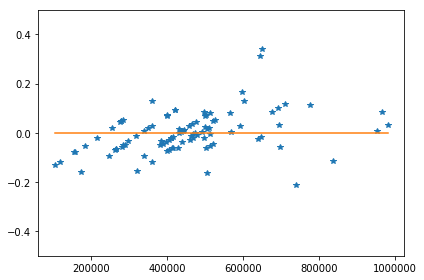

In [15]:
drawResidualPlot(y_test.values, reg.predict(X_test), np.min(y_test), np.max(y_test))

As can be seen in the residual plot, the data is spreaded out randomly around the horizontal line, which indicates that the model has successfully captured the trend in the data and it does not suffere from a significant unmodeled variation.

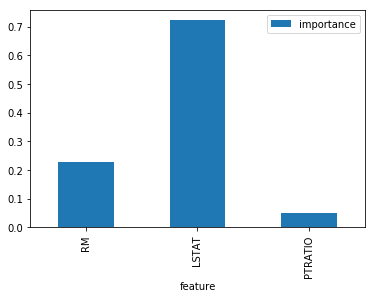

In [16]:
'''
trying to capture the importances of different features: Note that the data is not normalized here; 
however, since the range of features is close, it does not affect the conclusion mych.
'''
%matplotlib inline
pd.DataFrame(zip(X_train.columns, reg.feature_importances_), 
             columns=['feature', 'importance']).set_index('feature').plot(kind='bar')

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [17]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $415,935.48
Predicted selling price for Client 2's home: $233,647.83
Predicted selling price for Client 3's home: $881,650.00


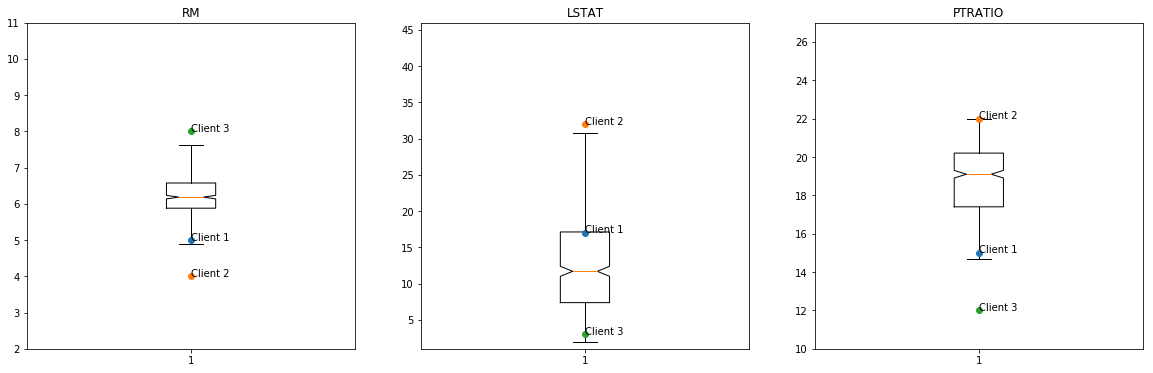

In [18]:
# Visualizing the clients' data for better understanding and comparing with the dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
y_limits = []
for feature in features.columns:
    y_limits.append([np.floor(0.8 * np.min(features[feature],axis=0)), np.ceil(1.2 * np.max(features[feature], axis=0))])

for enum, feature in enumerate(features.columns):
    plt.subplot(1, 3, enum + 1)
    plt.boxplot(features[feature], showfliers=False, notch=True, bootstrap=None)
    plt.title(feature)
    
    for id in range(len(client_data)):
        plt.plot(1, client_data[id][enum], marker="o")
        plt.annotate(xy=[1, client_data[id][enum]], s="Client {}".format(id + 1))
        plt.ylim(y_limits[enum])


**Answer: 
- __Assumption:__ The recommendations are provided for the homes assuming the conditions of the problem are the same as the data acquisition time.
- recommended price for client 1, 2, and 3 are __415,935.48__, __233,647.83__, and __881,650.00__ USD respectively.
- the predicted prices make sense based on their features. client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools. Clinet 1 also falls in between client 2 and 3 with respcet to all features. Therefore, the price should fall in between the prices recommended to client 2 and 3.

**

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [19]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: 
- __in short No__. The values for the model are not valid anymore since the prices have changed from the data acquisition time as well as the importance of each feature in the model; however, the nature of the problem is the same, especially for urban areas. Therefore, one can use the experience gained from this problem for training an updated model from recent data. The model will probably be similar with different values for each parameter. Following, the reasons behind the changes are discussed:

    - Different factors may affect the prices. Inflation, is crucial. change in the number of domestic/international students in nearby colleges, tech industry booming, natural price inflation, etc. affect the prices. The data in this project was acquired almost 4 decades ago. If one only considers inflation of 4 percent in the prices, the prices should have been more than quadrupled in the past 4 decades. Therefore, the target data is drastically different from the acquisition time.
    - features presented in the data are not sufficient for a very good model. The reason behind the small number of features in the data are (a) the creator of the data collection did not include some features in the dataset (such as proximity to public transportation or public places (malls)) and (b) new features now play a role in the prices based on people's lifestyle that were not as important in the past such as sustainabality, interior/exterior design type, etc.
    - The model is not robust enough due to the wide range that we observed in the example in question 10. One way to deal with it is to average the prices of multiple predictions and provide a standard deviation.
    - the data is specific to Boston. the featurs in this model happen to be more of universal features that can be used for a lot of other urban cities; however, if we had more features, the extension to other cities would be difficult. Moreover, the data cannot be used for rural areas due to the difference in the imporance of featues in rural and urban areas as well as a drastic diffrence in the values of the target parameter.
    - And finally, it is not fair to judge the price of an individual house based on the average price for the similar house in presented features due to the simplicity of the model. Two houses in the same neighborhood with the same size might have very different interior/exterior designss, amenities, building quality, proximity to certain public places, etc. that are not captured in the model and might have very different values. 





**

### Question 11 - Visual Representation of the Tree

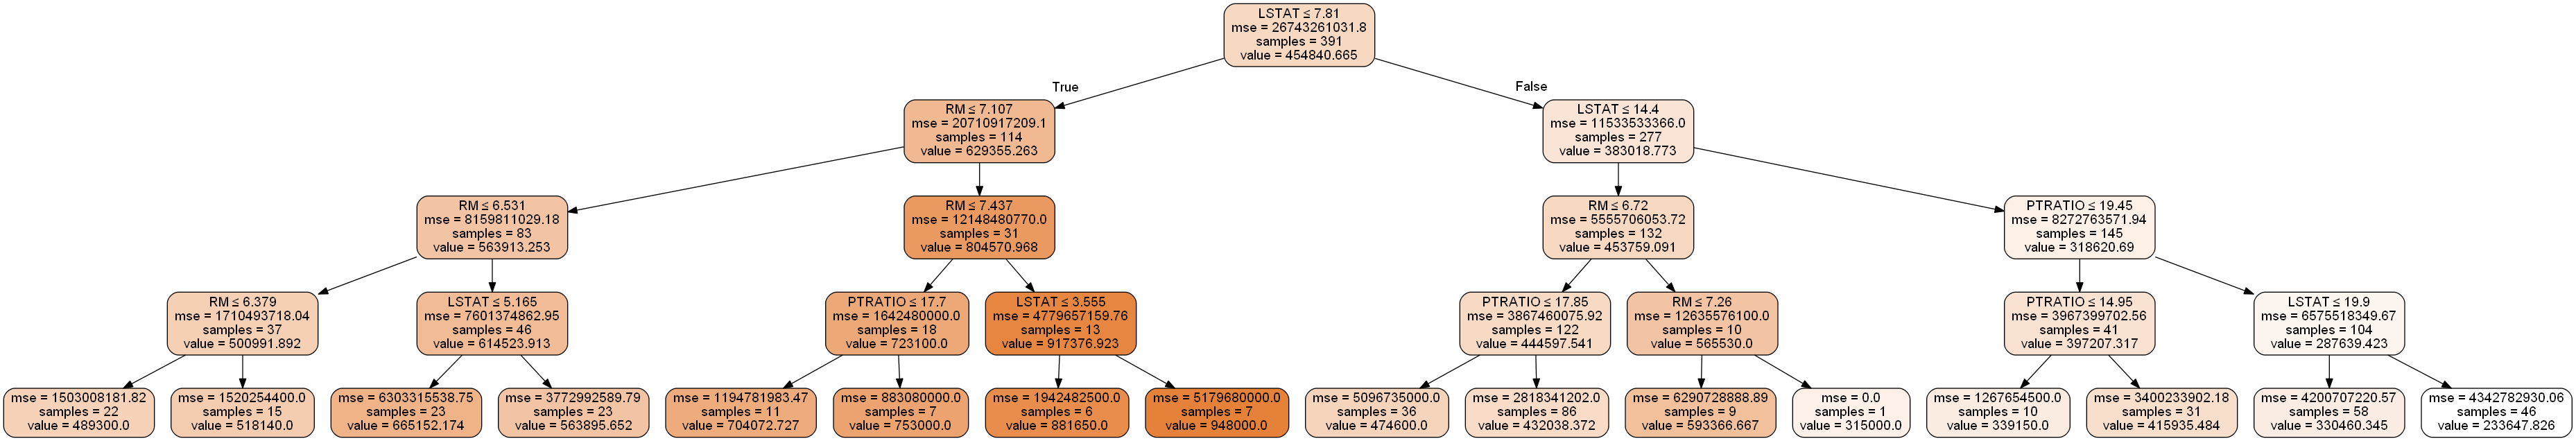

In [26]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.tree import export_graphviz
import pydot
dot_data = StringIO()
export_graphviz(reg, out_file=dot_data,
    feature_names=X_train.columns,
    class_names="PRICES",
    filled=True, rounded=True,
    special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [27]:
'''
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
dot_data = export_graphviz(reg, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Test_DT") 
dot_data = tree.export_graphviz(reg, out_file=None, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
'''

'\nimport graphviz\nfrom sklearn import tree\nfrom sklearn.tree import export_graphviz\ndot_data = export_graphviz(reg, out_file=None) \ngraph = graphviz.Source(dot_data) \ngraph.render("Test_DT") \ndot_data = tree.export_graphviz(reg, out_file=None, filled=True, rounded=True, special_characters=True)  \ngraph = graphviz.Source(dot_data)  \ngraph \n'

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.